# Something

## Libraries and Modules 

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import statsmodels.api as sm
sns.set()

## Dataset

In [25]:
dataset = pd.read_csv('dataset/Car_sales.csv')
dataset.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


## Variable exploration through descriptive statistics 

In [26]:
dataset.describe(include='all')

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
count,157,157,157.000000,121.000000,157,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,157,155.000000
unique,30,156,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,130,NaN
top,Ford,Neon,NaN,NaN,Passenger,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2/10/2011,NaN
freq,11,2,NaN,NaN,116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
mean,NaN,NaN,52.998076,18.072975,NaN,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,NaN,77.043591
std,NaN,NaN,68.029422,11.453384,NaN,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,NaN,25.142664
min,NaN,NaN,0.110000,5.160000,NaN,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,NaN,23.276272
25%,NaN,NaN,14.114000,11.260000,NaN,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000,NaN,60.407707
50%,NaN,NaN,29.450000,14.180000,NaN,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,NaN,72.030917
75%,NaN,NaN,67.956000,19.875000,NaN,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000,NaN,89.414878


In [27]:
data = dataset.drop(['Model'],axis=1)

In [32]:
data.isnull().sum()

Manufacturer            0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
dtype: int64

## Drop all missing value

In [35]:
data_no_mv = data.dropna(axis=0)
data_no_mv.isnull().sum()

Manufacturer           0
Sales_in_thousands     0
__year_resale_value    0
Vehicle_type           0
Price_in_thousands     0
Engine_size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb_weight            0
Fuel_capacity          0
Fuel_efficiency        0
Latest_Launch          0
Power_perf_factor      0
dtype: int64

## Display the probability distribution function (PDF) of a variable

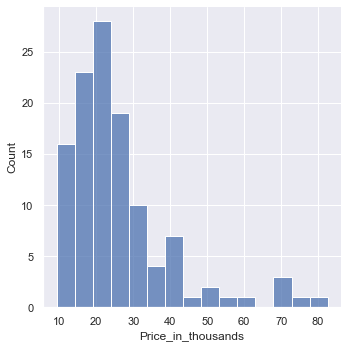

In [38]:
sns.displot(data_no_mv['Price_in_thousands'])
# There is outliers present to this graph, the outliers situated around higher prices(right side of the graph)

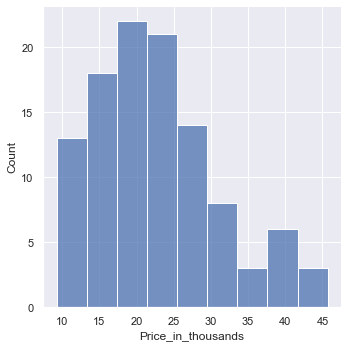

In [43]:
# I just removing by 0.5% or 1% of the problematic samples
q = data_no_mv['Price_in_thousands'].quantile(0.93)
data_1 = data_no_mv[data_no_mv['Price_in_thousands']<q]
sns.displot(data_1['Price_in_thousands'])

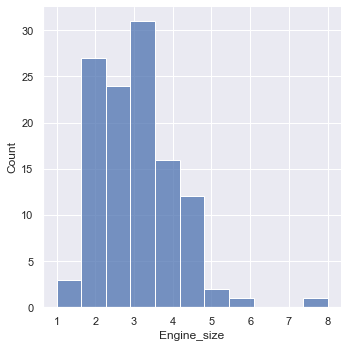

In [45]:
sns.displot(data_no_mv['Engine_size'])

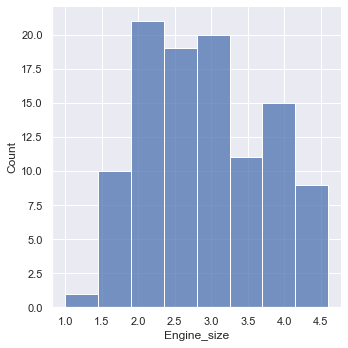

In [50]:
q = data_1['Engine_size'].quantile(0.99)
data_2 = data_1[data_1['Engine_size']<q]
sns.displot(data_2['Engine_size'])

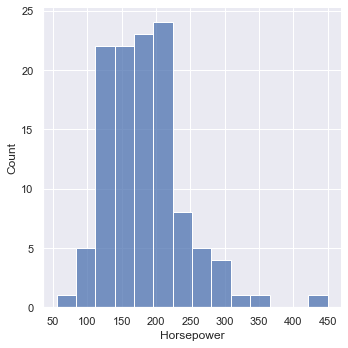

In [52]:
sns.displot(data_no_mv['Horsepower'])

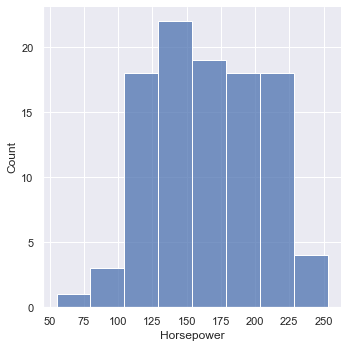

In [53]:
q = data_2['Horsepower'].quantile(0.999)
data_3 = data_2[data_2['Horsepower']<q]
sns.displot(data_3['Horsepower'])

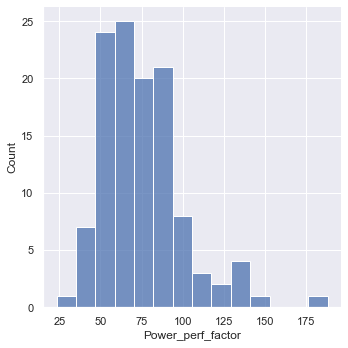

In [57]:
sns.displot(data_no_mv['Power_perf_factor'])

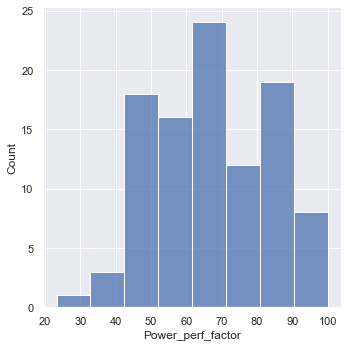

In [55]:
q = data_3['Power_perf_factor'].quantile(0.99)
data_4 = data_3[data_3['Power_perf_factor']<q]
sns.displot(data_4['Power_perf_factor'])

In [56]:
data_4.describe()
# We can see that there are no outliers on some samples

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,64.253257,14.870198,21.825822,2.814851,164.643564,106.971287,70.807921,186.603960,3.243010,17.386139,24.633663,67.386582
std,76.655634,6.202421,7.489772,0.827815,38.572421,7.380628,3.518172,13.418218,0.568841,3.752147,4.412987,16.276875
min,0.110000,5.160000,9.235000,1.000000,55.000000,93.100000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,20.380000,10.595000,16.540000,2.000000,132.000000,102.400000,68.300000,177.500000,2.879000,15.100000,22.000000,53.566200
50%,35.945000,13.475000,21.200000,2.700000,168.000000,106.500000,70.300000,186.300000,3.219000,17.000000,25.000000,67.351011
75%,80.556000,17.710000,26.000000,3.400000,200.000000,110.200000,72.700000,194.600000,3.561000,19.000000,27.000000,81.492726
max,540.561000,41.250000,43.330000,4.600000,240.000000,138.500000,79.100000,224.500000,4.808000,32.000000,45.000000,100.024802


In [168]:
data_cleaned = data_4.reset_index(drop=True)
# we reset the index, a new column will be created containing the old index
data_4

,Manufacturer,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
3,Acura,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
5,Audi,18.780,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,8/9/2011,84.565105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Volkswagen,9.761,11.425,Passenger,14.90,2.0,115.0,98.9,68.3,163.3,2.767,14.5,26.0,1/24/2011,46.943877
146,Volkswagen,83.721,13.240,Passenger,16.70,2.0,115.0,98.9,68.3,172.3,2.853,14.5,26.0,8/27/2011,47.638237
147,Volkswagen,51.102,16.725,Passenger,21.20,1.8,150.0,106.4,68.5,184.1,3.043,16.4,27.0,10/30/2012,61.701381
148,Volkswagen,9.569,16.575,Passenger,19.99,2.0,115.0,97.4,66.7,160.4,3.079,13.7,26.0,5/31/2011,48.907372


## Checking the OLS assumptions 

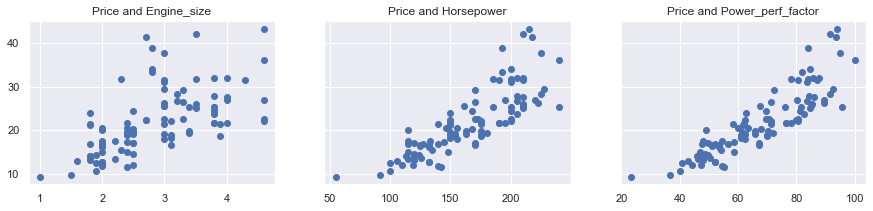

In [106]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(data_cleaned['Engine_size'],data_cleaned['Price_in_thousands'])
ax1.set_title('Price and Engine_size')
ax2.scatter(data_cleaned['Horsepower'],data_cleaned['Price_in_thousands'])
ax2.set_title('Price and Horsepower')
ax3.scatter(data_cleaned['Power_perf_factor'],data_cleaned['Price_in_thousands'])
ax3.set_title('Price and Power_perf_factor')

plt.show()

In [189]:
# Determine that 'Price' is exponentially distributed
# A good transformation in that case is a log transformation
# Let's transform 'Price_in_thousands' with a log transformation
log_price = np.log(data_cleaned['Price_in_thousands'])

# Then we add it to our data frame
data_cleaned['log_price'] = log_price

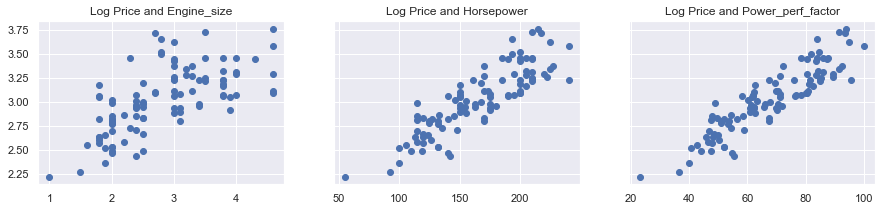

In [190]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(data_cleaned['Engine_size'],data_cleaned['log_price'])
ax1.set_title('Log Price and Engine_size')
ax2.scatter(data_cleaned['Horsepower'],data_cleaned['log_price'])
ax2.set_title('Log Price and Horsepower')
ax3.scatter(data_cleaned['Power_perf_factor'],data_cleaned['log_price'])
ax3.set_title('Log Price and Power_perf_factor')

plt.show()

# The relationships show a more clear linear relationship
# This is some good linear regression material

In [193]:
data_cleaned
#data_cleaned.drop(['Latest_Launch', 'Price_in_thousands'],axis=1)

,Manufacturer,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,log_price
0,Acura,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150,3.068053
1,Acura,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778,3.346389
2,Acura,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779,3.737670
3,Audi,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639,3.177637
4,Audi,18.780,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,84.565105,3.524889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,Volkswagen,9.761,11.425,Passenger,14.90,2.0,115.0,98.9,68.3,163.3,2.767,14.5,26.0,46.943877,2.701361
97,Volkswagen,83.721,13.240,Passenger,16.70,2.0,115.0,98.9,68.3,172.3,2.853,14.5,26.0,47.638237,2.815409
98,Volkswagen,51.102,16.725,Passenger,21.20,1.8,150.0,106.4,68.5,184.1,3.043,16.4,27.0,61.701381,3.054001
99,Volkswagen,9.569,16.575,Passenger,19.99,2.0,115.0,97.4,66.7,160.4,3.079,13.7,26.0,48.907372,2.995232


In [194]:
data_cleaned.columns.values

array(['Manufacturer', 'Sales_in_thousands', '__year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Power_perf_factor', 'log_price'], dtype=object)

## Create dummy variable

In [195]:
# To include the categorical data in the regression, let's create dummies
dummy = pd.get_dummies(data_cleaned, drop_first=True)
data_with_dummy = dummy.drop(['Price_in_thousands'], axis=1)

In [196]:
data_with_dummy.columns.values

array(['Sales_in_thousands', '__year_resale_value', 'Engine_size',
       'Horsepower', 'Wheelbase', 'Width', 'Length', 'Curb_weight',
       'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor',
       'log_price', 'Manufacturer_Audi', 'Manufacturer_BMW',
       'Manufacturer_Buick', 'Manufacturer_Cadillac',
       'Manufacturer_Chevrolet', 'Manufacturer_Chrysler',
       'Manufacturer_Dodge', 'Manufacturer_Ford', 'Manufacturer_Honda',
       'Manufacturer_Hyundai', 'Manufacturer_Infiniti',
       'Manufacturer_Jeep', 'Manufacturer_Lexus', 'Manufacturer_Lincoln',
       'Manufacturer_Mercedes-B', 'Manufacturer_Mercury',
       'Manufacturer_Mitsubishi', 'Manufacturer_Nissan',
       'Manufacturer_Oldsmobile', 'Manufacturer_Plymouth',
       'Manufacturer_Pontiac', 'Manufacturer_Porsche',
       'Manufacturer_Saturn', 'Manufacturer_Toyota',
       'Manufacturer_Volkswagen', 'Vehicle_type_Passenger'], dtype=object)

In [200]:
cols = ['log_price', 'Sales_in_thousands', '__year_resale_value', 'Engine_size',
       'Horsepower', 'Wheelbase', 'Width', 'Length', 'Curb_weight',
       'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor',
       'Manufacturer_Audi', 'Manufacturer_BMW', 'Manufacturer_Buick',
       'Manufacturer_Cadillac', 'Manufacturer_Chevrolet',
       'Manufacturer_Chrysler', 'Manufacturer_Dodge', 'Manufacturer_Ford',
       'Manufacturer_Honda', 'Manufacturer_Hyundai',
       'Manufacturer_Infiniti', 'Manufacturer_Jeep', 'Manufacturer_Lexus',
       'Manufacturer_Lincoln', 'Manufacturer_Mercedes-B',
       'Manufacturer_Mercury', 'Manufacturer_Mitsubishi',
       'Manufacturer_Nissan', 'Manufacturer_Oldsmobile',
       'Manufacturer_Plymouth', 'Manufacturer_Pontiac',
       'Manufacturer_Porsche', 'Manufacturer_Saturn',
       'Manufacturer_Toyota', 'Manufacturer_Volkswagen',
       'Vehicle_type_Passenger']

In [203]:
data_preprocessed = data_with_dummy[cols]
data_preprocessed.head()

,log_price,Sales_in_thousands,__year_resale_value,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,...,Manufacturer_Mitsubishi,Manufacturer_Nissan,Manufacturer_Oldsmobile,Manufacturer_Plymouth,Manufacturer_Pontiac,Manufacturer_Porsche,Manufacturer_Saturn,Manufacturer_Toyota,Manufacturer_Volkswagen,Vehicle_type_Passenger
0,3.068053,16.919,16.360,1.8,140.0,101.2,67.3,172.4,2.639,13.2,...,0,0,0,0,0,0,0,0,0,1
1,3.346389,39.384,19.875,3.2,225.0,108.1,70.3,192.9,3.517,17.2,...,0,0,0,0,0,0,0,0,0,1
2,3.737670,8.588,29.725,3.5,210.0,114.6,71.4,196.6,3.850,18.0,...,0,0,0,0,0,0,0,0,0,1
3,3.177637,20.397,22.255,1.8,150.0,102.6,68.2,178.0,2.998,16.4,...,0,0,0,0,0,0,0,0,0,1
4,3.524889,18.780,23.555,2.8,200.0,108.7,76.1,192.0,3.561,18.5,...,0,0,0,0,0,0,0,0,0,1


## Linear regression model

In [204]:
# Declare targets and inputs

targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'],axis=1)

In [205]:
# Scale the data

scaler = StandardScaler()
scaler.fit(inputs)

# store inputs/features in a new variable
inputs_scaled = scaler.transform(inputs)

In [206]:
# Train Test Split
# Split the variables with an 75-25 split and some random state
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.25, random_state=365)

# Create the regression
reg = LinearRegression() 
# Fit the regression with the scaled TRAIN inputs and targets
reg.fit(x_train,y_train)

LinearRegression()

In [207]:
# Store outputs in y_hat as this is the 'theoretical' name of the predictions
y_hat = reg.predict(x_train)

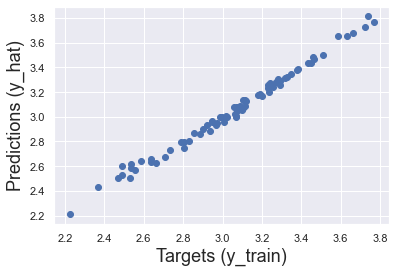

In [208]:
# Compare the targets (y_train) and the predictions (y_hat) is to plot them on a scatter plot
# The closer the points to the 45-degree line, the better the prediction
plt.scatter(y_train, y_hat)

# name the axes
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

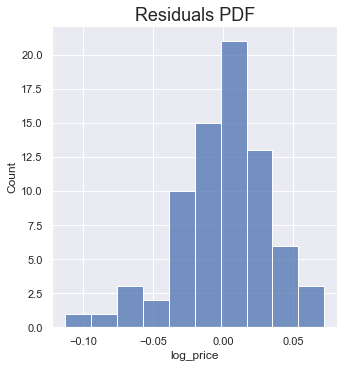

In [209]:
# Plot the PDF of the residuals and check for anomalies
sns.displot(y_train - y_hat)
plt.title("Residuals PDF", size=18)

# we notice that there are many negative residuals
# given the definition of the residuals (y_train - y_hat), negative values imply
# that y_hat (predictions) are much higher than y_train (the targets)

In [210]:
# Find the R-squared of the model
reg.score(x_train,y_train)

0.9903307865424741

In [211]:
# Find the bias (intercept) of the regression
reg.intercept_

3.037757031955687

In [212]:
# Find the weights (coefficients) of the regression
reg.coef_

array([-1.82680415e-03, -4.25794583e-02, -7.19472119e-02, -1.36073601e+00,
       -2.61673091e-02,  3.23197103e-02,  2.30144425e-02, -1.18919585e-02,
       -4.19658639e-03, -5.76287659e-02,  1.69136223e+00,  1.29026959e-02,
        7.65354632e-03, -7.02801147e-04, -4.19571364e-03, -7.81505320e-03,
       -7.29531859e-03, -2.53559664e-02, -2.46040504e-02, -6.93252833e-03,
       -2.70596182e-02, -2.36769068e-03, -1.67502711e-03, -2.11809659e-03,
       -1.79526968e-02, -4.44089210e-16, -4.63455354e-03, -8.38012504e-03,
       -5.51864954e-03,  1.14275224e-03, -2.26904103e-02,  5.78208602e-03,
       -7.86769212e-03, -8.41299507e-03,  9.55001129e-03,  2.32185574e-02,
       -1.32157818e-02])

In [213]:
# Regression summary where we can compare them with one-another
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Sales_in_thousands,-1.826804e-03
1,__year_resale_value,-4.257946e-02
2,Engine_size,-7.194721e-02
3,Horsepower,-1.360736e+00
4,Wheelbase,-2.616731e-02
5,Width,3.231971e-02
6,Length,2.301444e-02
7,Curb_weight,-1.189196e-02
8,Fuel_capacity,-4.196586e-03
9,Fuel_efficiency,-5.762877e-02


In [214]:
data_cleaned['Manufacturer'].unique()

array(['Acura', 'Audi', 'BMW', 'Buick', 'Cadillac', 'Chevrolet',
       'Chrysler', 'Dodge', 'Ford', 'Honda', 'Hyundai', 'Infiniti',
       'Jeep', 'Lexus', 'Lincoln', 'Mitsubishi', 'Mercury', 'Mercedes-B',
       'Nissan', 'Oldsmobile', 'Plymouth', 'Pontiac', 'Porsche', 'Saturn',
       'Toyota', 'Volkswagen'], dtype=object)

## Testing

In [217]:
# test inputs are 'x_test', while the outputs: 'y_test' 
y_hat_test = reg.predict(x_test)

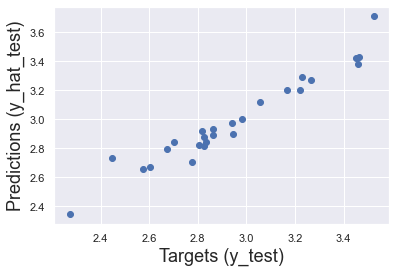

In [220]:
# Create a scatter plot with the test targets and the test predictions
plt.scatter(y_test, y_hat_test)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.show()

In [221]:
# manually check these predictions
# To obtain the actual prices, we take the exponential of the log_price
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,18.499011
1,14.434382
2,14.259367
3,20.186354
4,24.614762


In [222]:
# include the test targets in that data frame
df_pf['Target'] = np.exp(y_test)
df_pf

# There are a lot of missing values

,Prediction,Target
0,18.499011,NaN
1,14.434382,NaN
2,14.259367,NaN
3,20.186354,NaN
4,24.614762,33.950
5,10.419159,NaN
6,16.747218,NaN
7,26.994167,NaN
8,17.215186,25.300
9,30.917439,NaN


In [223]:
# After displaying y_test, we find what the issue is
# The old indexes are preserved (recall earlier in that code we made a note on that)
# The code was: data_cleaned = data_4.reset_index(drop=True)

# Therefore, to get a proper result, we must reset the index and drop the old indexing
y_test = y_test.reset_index(drop=True)

# Check the result
y_test.head()

0    2.815409
1    2.602616
2    2.573223
3    2.981633
4    3.218756
Name: log_price, dtype: float64

In [224]:
# overwrite the 'Target' column with the appropriate values

df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,18.499011,16.700
1,14.434382,13.499
2,14.259367,13.108
3,20.186354,19.720
4,24.614762,24.997
5,10.419159,9.699
6,16.747218,16.875
7,26.994167,25.300
8,17.215186,14.900
9,30.917439,31.930


In [225]:
# calculate the difference between the targets and the predictions
# the residual that already plotted
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

# Since OLS is basically an algorithm which minimizes the total sum of squared errors (residuals)

In [226]:
# we take the absolute difference in %, so we can easily order the data frame
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,18.499011,16.700,-1.799011,10.772522
1,14.434382,13.499,-0.935382,6.929272
2,14.259367,13.108,-1.151367,8.783699
3,20.186354,19.720,-0.466354,2.364878
4,24.614762,24.997,0.382238,1.529134
5,10.419159,9.699,-0.720159,7.425084
6,16.747218,16.875,0.127782,0.757227
7,26.994167,25.300,-1.694167,6.696313
8,17.215186,14.900,-2.315186,15.538163
9,30.917439,31.930,1.012561,3.171189


In [227]:
# To see all rows
pd.options.display.max_rows = 999

# make the dataset clear, we can display the result with only 2 digits after the dot 
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# sort by difference in % and manually check the model
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
18,26.34,26.25,-0.10,0.36
15,17.13,17.04,-0.09,0.54
6,16.75,16.88,0.13,0.76
4,24.61,25.00,0.38,1.53
20,16.81,16.53,-0.28,1.69
3,20.19,19.72,-0.47,2.36
12,18.05,17.52,-0.54,3.06
9,30.92,31.93,1.01,3.17
10,30.59,31.60,1.01,3.20
14,24.53,23.76,-0.77,3.25
